<a href="https://colab.research.google.com/github/delemarchand2020/MiscellaneousColab/blob/main/AnalyseSondageDevops.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initialisation du rapport

In [197]:
#@title Import des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [63]:
#@title Lecture du fichier de données du sondage
file_name = "https://github.com/delemarchand2020/MiscellaneousColab/raw/main/sondage_devops.xlsx"
df = pd.read_excel(file_name, sheet_name='data')
nb_repondant = df.shape[0]

# Analyse générale

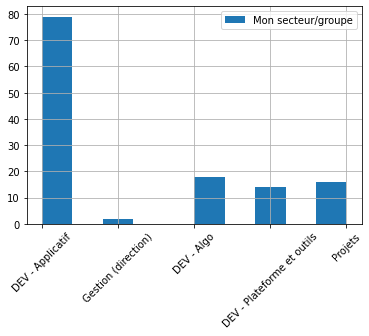

In [64]:
#@title Répartition des répondants par secteur
dummy = df['Mon secteur/groupe'].hist(legend=True, xrot=45)

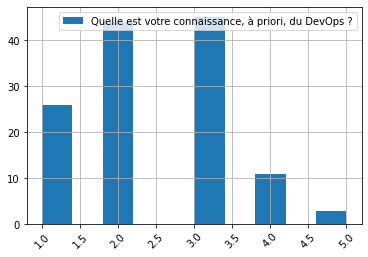

In [65]:
#@title Connaissance à priori du Devops - distribution des notes (1 à 5)
dummy = df['Quelle est votre connaissance, à priori, du DevOps ?'].hist(legend=True, xrot=45)

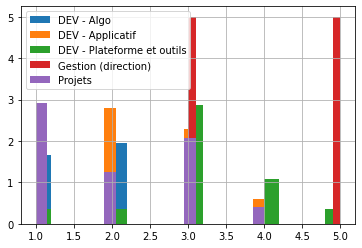

In [66]:
#@title Connaissance à priori du Devops par secteur - distribution des notes (1 à 5)
dummy = df.groupby('Mon secteur/groupe')['Quelle est votre connaissance, à priori, du DevOps ?'].hist(legend=True, density=True, bins=20)

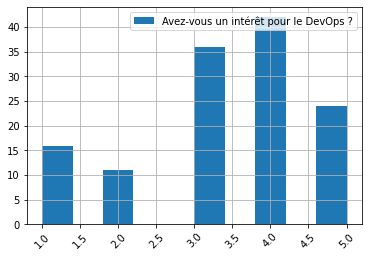

In [67]:
#@title Intérêt pour le Devops - distribution des notes (1 à 5)
dummy = df['Avez-vous un intérêt pour le DevOps ?'].hist(legend=True, xrot=45)

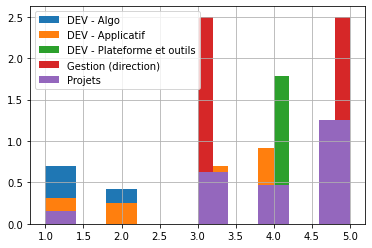

In [68]:
#@title Intérêt pour le Devops par secteur - distribution des notes (1 à 5)
dummy = df.groupby('Mon secteur/groupe')['Avez-vous un intérêt pour le DevOps ?'].hist(legend=True, density=True, bins=10)

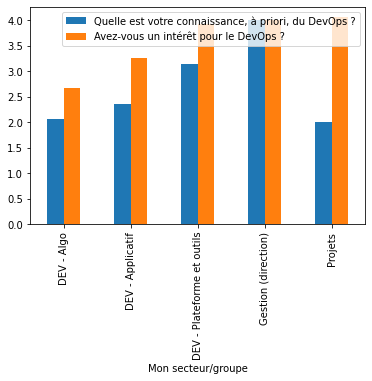

In [69]:
#@title Comparaison de la note moyenne par secteur connaissance versus intérêt
dummy = df.groupby('Mon secteur/groupe')['Quelle est votre connaissance, à priori, du DevOps ?',
                                         'Avez-vous un intérêt pour le DevOps ?'].mean().plot(kind = 'bar')

# Analyse des thèmes et sujets

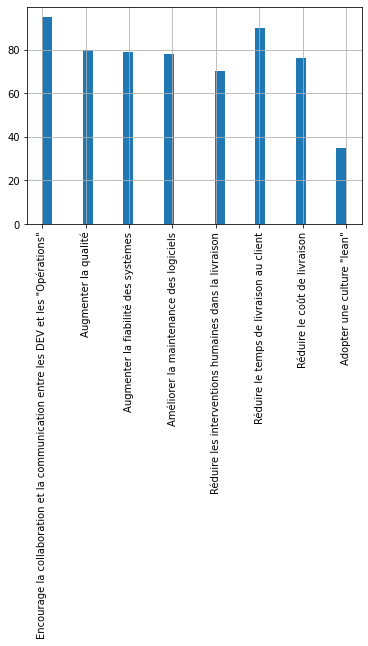

In [70]:
#@title Classemement de ce que permet le Devops selon l'ensemble des répondants
new_df = df['Selon vous, que permet le DevOps ?'].str.split(';', expand=True)
new_df = new_df.stack().reset_index()
new_df = new_df[new_df != '']
dummy = new_df[0].hist(xrot=90, density=False, bins=30)

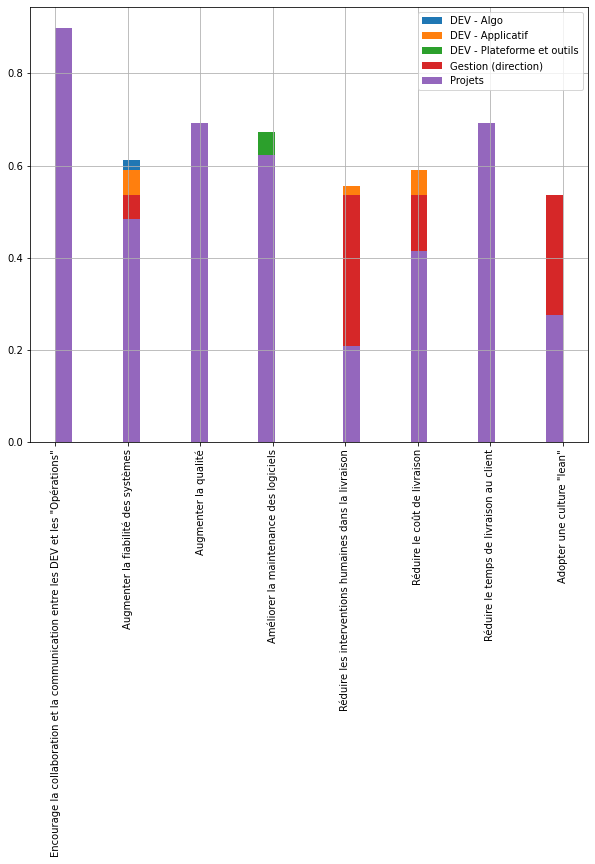

In [211]:
#@title Classement de ce que permet le Devops selon les secteurs
#@title Classement des requis pour faire du Devops selon les secteurs
new_df = df.loc[:,['Mon secteur/groupe','Selon vous, que permet le DevOps ?']]
new_cols = new_df['Selon vous, que permet le DevOps ?'].str.split(';', expand=True)
new_df = pd.concat([new_df, new_cols], axis=1)
new_df = new_df.drop(columns=['Selon vous, que permet le DevOps ?'])
new_df = new_df.stack().reset_index() 
new_data = []
secteur_name = ''
for x in new_df.values:
  if x[1] == 'Mon secteur/groupe':
    secteur_name = x[2]
    continue
  if x[2] != '':
    new_data.append([secteur_name, x[2]])

new_df_2 = pd.DataFrame(new_data,columns=['secteur', 'item_permet_devops'])
new_df_2

plt.figure(figsize=[10,8])
dummy = new_df_2.groupby('secteur')['item_permet_devops'].hist(legend=True, density=True, bins=30, xrot=90)

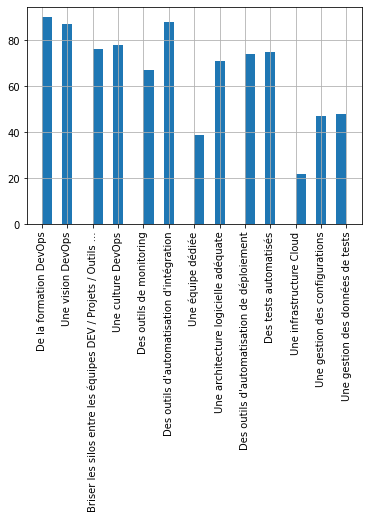

In [71]:
#@title Classemement des requis pour faire du Devops selon l'ensemble des répondants
new_df = df['Selon vous, pour faire du DevOps, il faut quoi ?'] .str.split(';', expand=True)
new_df = new_df.stack().reset_index()
new_df = new_df[new_df != '']
dummy = new_df[0].hist(xrot=90, density=False, bins=30)

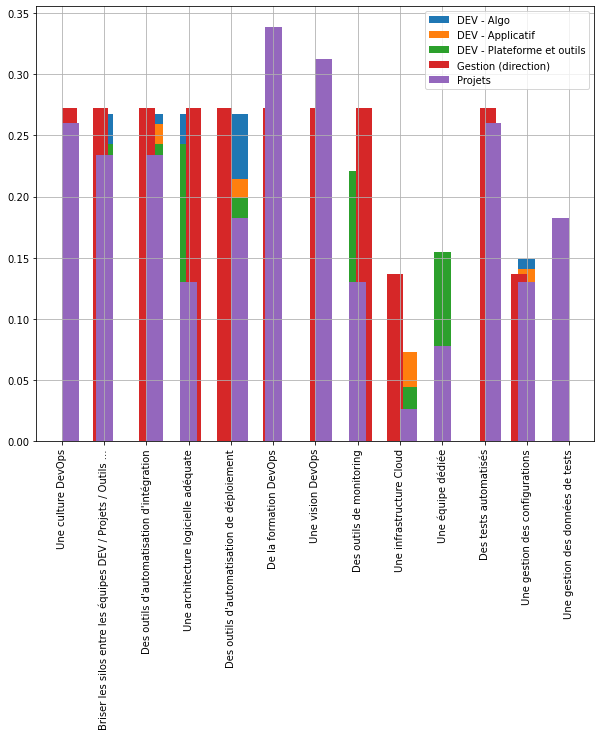

In [210]:
#@title Classement des requis pour faire du Devops selon les secteurs
new_df = df.loc[:,['Mon secteur/groupe','Selon vous, pour faire du DevOps, il faut quoi ?']]
new_cols = new_df['Selon vous, pour faire du DevOps, il faut quoi ?'].str.split(';', expand=True)
new_df = pd.concat([new_df, new_cols], axis=1)
new_df = new_df.drop(columns=['Selon vous, pour faire du DevOps, il faut quoi ?'])
new_df = new_df.stack().reset_index() 
new_data = []
secteur_name = ''
for x in new_df.values:
  if x[1] == 'Mon secteur/groupe':
    secteur_name = x[2]
    continue
  if x[2] != '':
    new_data.append([secteur_name, x[2]])

new_df_2 = pd.DataFrame(new_data,columns=['secteur', 'item_pour_faire_devops'])
new_df_2

plt.figure(figsize=[10,8])
dummy = new_df_2.groupby('secteur')['item_pour_faire_devops'].hist(legend=True, density=True, bins=30, xrot=90)